<a href="https://colab.research.google.com/github/FZsara/image_processing/blob/main/ip_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


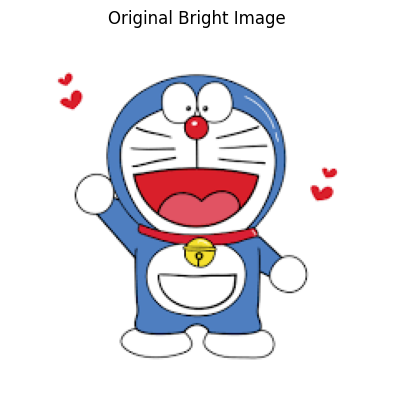

Single Threshold (128) - RGB:
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]



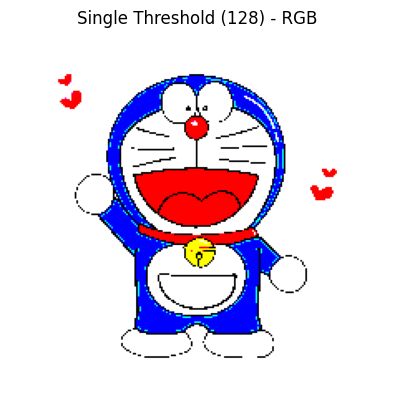

Dual Threshold (100, 200) - RGB:
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]



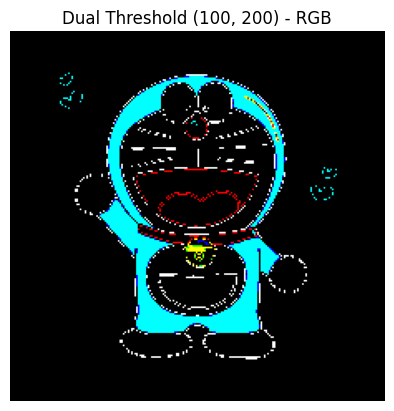

Grayscale Threshold with Range (100, 200) - Grayscale:
[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]



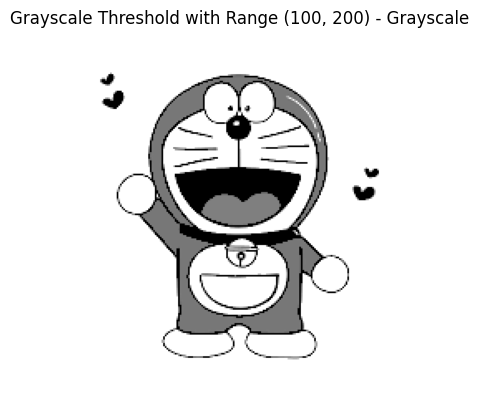

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image in RGB mode (bright image)
    image = Image.open(image_path).convert('RGB')
    return np.array(image)

def convert_to_grayscale(image_array):
    # Convert the RGB image to grayscale using the luminosity method
    return np.dot(image_array[..., :3], [0.2989, 0.587, 0.114])

# Thresholding operations for RGB images (operate on each channel independently)
def single_threshold(image_array, threshold):
    # Apply single threshold to each channel of the RGB image
    return np.where(image_array > threshold, 255, 0)

def dual_threshold(image_array, low_threshold, high_threshold):
    # Apply dual threshold to each channel of the RGB image
    return np.where((image_array > low_threshold) & (image_array <= high_threshold), 255, 0)

# Grayscale thresholding applied on the grayscale version of the image
def grayscale_threshold_with_range(image_array, low_threshold, high_threshold):
    return np.where(image_array < low_threshold, 0,
                    np.where(image_array > high_threshold, 255, image_array))

def display_image(image_array, title, is_grayscale=False):
    # Display the image in color or grayscale
    if is_grayscale:
        plt.imshow(image_array, cmap='gray')
    else:
        plt.imshow(np.clip(image_array, 0, 255).astype(np.uint8))
    plt.title(title)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    image_path = '/content/drive/MyDrive/dorae.png'
    image_array = load_image(image_path)

    # Convert the image to grayscale for the grayscale thresholding operation
    grayscale_image = convert_to_grayscale(image_array)

    # Perform thresholding operations
    single_threshold_image = single_threshold(image_array, 128)  # Single threshold on RGB image
    dual_threshold_image = dual_threshold(image_array, 100, 200)  # Dual threshold on RGB image
    grayscale_threshold_image = grayscale_threshold_with_range(grayscale_image, 100, 200)  # Grayscale threshold on grayscale image

    # Display the original bright image
    display_image(image_array, "Original Bright Image")

    # Display thresholded images (Single and Dual on RGB, Grayscale Threshold on grayscale)
    threshold_operations = {
        "Single Threshold (128) - RGB": single_threshold_image,
        "Dual Threshold (100, 200) - RGB": dual_threshold_image,
        "Grayscale Threshold with Range (100, 200) - Grayscale": grayscale_threshold_image
    }

    for title, image in threshold_operations.items():
        # If it's a grayscale operation, display it as grayscale
        is_grayscale = "Grayscale" in title
        print(f"{title}:\n{image}\n")
        display_image(image, title, is_grayscale=is_grayscale)
